In [1]:
from CyNN.CyNN import *
import matplotlib.pyplot as plt

## Forward Model
We model the imaging process of a fluorescence microscope via a convolution with a gaussian point-spread-function and the addtion of different kinds of noise. The foward parameter dictionary below, contains parameters that produce a model that accurately matches the imagaing process for the example images used for this project.

In [ ]:
forward_params = {'n': 15, 'res':(80,80,16), 'err': 0.015, 'blur':1.0, 'back':0.02,'backnoise':0.05,'lowfreq':0.05,'filnoise':0.07}
y,gt = FilamentReconstructor.gen_training_data(3,(80,80,16),forward_params)

### Proper Parameter Choice
We load some real fluorescence microscopy images (FMI) and compare them to simulated images to correctly adjust the forward model parameters to generate realistic images. This is necessary so that the CNN to be trained on such simulated data can generalize the learned filament extraction to the real image data.

In [32]:
# load an example image
image = np.asfarray(Image.open("example_img/7-cell_C002T001.tif"))
roi1 = (500,580,400,480)
roi2 = (200,280,200,280)
roi3 = (200,280,150,230)
obs1 = image[roi1[0]:roi1[1],roi1[2]:roi1[3]]
obs2 = image[roi2[0]:roi2[1],roi2[2]:roi2[3]]
obs3 = image[roi3[0]:roi3[1],roi3[2]:roi3[3]]

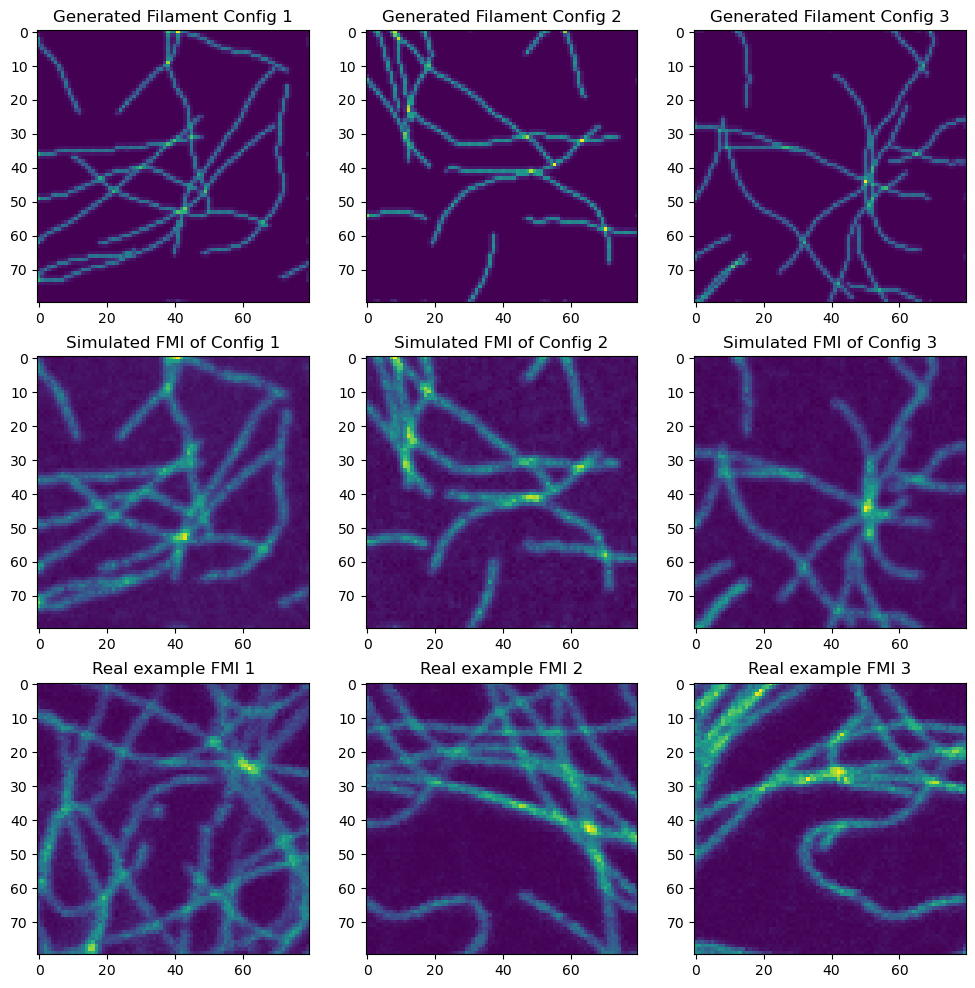

In [45]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.title("Generated Filament Config 1")
plt.imshow(np.sum(gt[0,:,:,:],axis=2))
plt.subplot(3,3,2)
plt.title("Generated Filament Config 2")
plt.imshow(np.sum(gt[1,:,:,:],axis=2))
plt.subplot(3,3,3)
plt.title("Generated Filament Config 3")
plt.imshow(np.sum(gt[2,:,:,:],axis=2))
plt.subplot(3,3,4)
plt.title("Simulated FMI of Config 1")
plt.imshow(y[0,:,:])
plt.subplot(3,3,5)
plt.title("Simulated FMI of Config 2")
plt.imshow(y[1,:,:])
plt.subplot(3,3,6)
plt.title("Simulated FMI of Config 3")
plt.imshow(y[2,:,:])
plt.subplot(3,3,7)
plt.title("Real example FMI 1")
plt.imshow(obs1)
plt.subplot(3,3,8)
plt.title("Real example FMI 2")
plt.imshow(obs2)
plt.subplot(3,3,9)
plt.title("Real example FMI 3")
plt.imshow(obs3)

##### Intensity Profile

We consider the distribution of the intensity found in simulated and examples of the real FMI images from which filaments shall be extracted. Should both roughly agree in shape (up to a shift and scale difference) the forward model can be used to generate training data.
Below we compare the histogram of 3 samples of example data to 3 random samples generated under the chosen forward model.

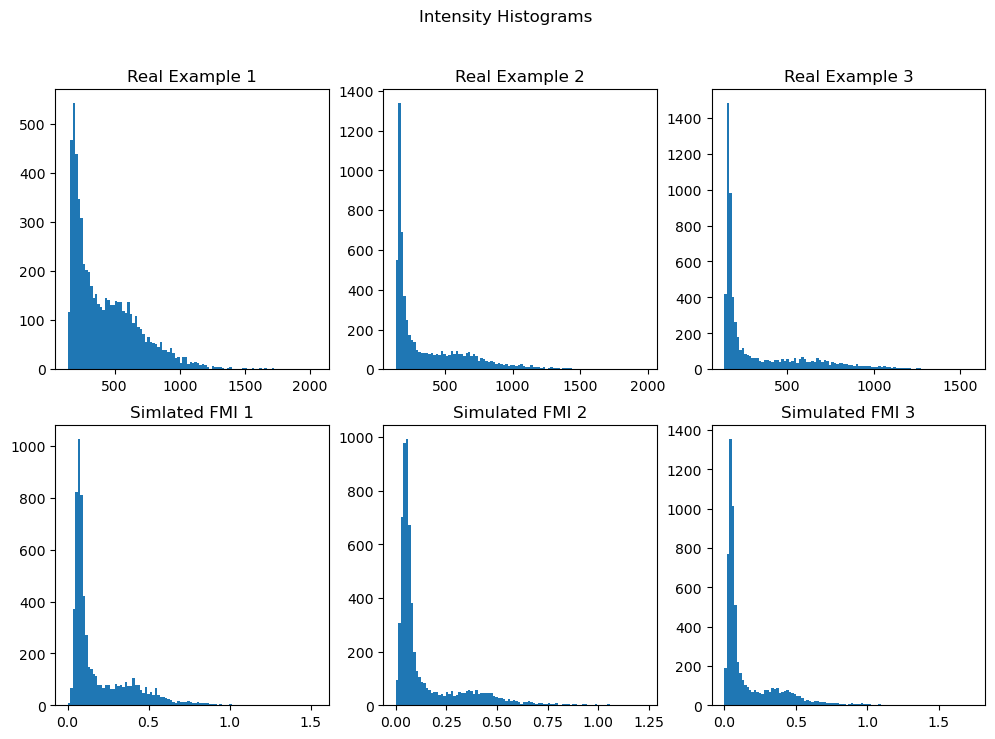

In [46]:
plt.figure(figsize=(12,8))
plt.suptitle("Intensity Histograms")
plt.subplot(2,3,1)
plt.title("Real Example 1")
h = plt.hist(obs1.flatten(),bins=100)
plt.subplot(2,3,2)
plt.title("Real Example 2")
h = plt.hist(obs2.flatten(),bins=100)
plt.subplot(2,3,3)
plt.title("Real Example 3")
h = plt.hist(obs3.flatten(),bins=100)
plt.subplot(2,3,4)
plt.title("Simlated FMI 1")
h = plt.hist(y[0].flatten(),bins=100)
plt.subplot(2,3,5)
plt.title("Simulated FMI 2")
h = plt.hist(y[1].flatten(),bins=100)
plt.subplot(2,3,6)
plt.title("Simulated FMI 3")
h = plt.hist(y[2].flatten(),bins=100)

### Train a Reconstruction Model
Once the correct parameters for the forward model have been specified, it is straighfoward to simulate a batch of images and train a convolutional neural network to reconstruct, denoise and separate the filaments in these simulated images. Finally, one may then apply the model to process real images.

In [ ]:
# example how to train and save a new model, given the forward model parameters
fwd_params = {'n': 15, 'res':(80,80,16), 'err': 0.015, 'blur':1.0, 'back':0.02,'backnoise':0.05,'lowfreq':0.05,'filnoise':0.07}
# train an example models on 2000 samples in 60 epochs, the network takes 80*80 pixel image parts and represents filaments using 16 different orientations
example_model = FilamentReconstructor.train_model(2000,(80,80,16),6)
# save the result
#example_model.save("models/example_80")